<a href="https://colab.research.google.com/github/alanagadelha/Python-Training/blob/master/Alana_T1_Analise_Uni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício de análise univariada: Um termômetro que registra temperatura em graus Celcius é aferido em um banho de agua em ebulição a 100 $^o$C, pressão ambiente de 1 ATM. Os dados estão disponíveis [Aqui](https://docs.google.com/spreadsheets/d/11u_IVzXzub-CWqJLRGY3AonDH09fs3LT/edit?usp=sharing&ouid=115506949950933796175&rtpof=true&sd=true)

#
Pede-se:

1) Leia e faça um gráfico dos dados;
2) Cálculo a média, desvio padrão e mediana;
3) Histogramas e gráficos de pizza;
4) Faça o teste de Chi-Quadrado para verificar se a amostra respeita a distribuição normal;
5) Obtenha a temperatura média agrupando medidas de i) 10 em 10 pontos, ii) 20 em 20 pontos, iii) 30 em 30 pontos;

In [ ]:
# -*- coding: utf-8 -*-
#Importando as bibliotecas necessárias
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
#1) Leia e faça um gráfico dos dados;

temp_ebulicao = [100.84, 100.62, 99.83, 99.64, 99.72, 99.81, 99.99, 100.22, 100.12, 100.07, 100.33, 100.26,
                 99.73, 99.47, 99.90, 99.86, 99.40, 99.73, 100.42, 99.70, 99.81, 99.63, 100.13, 100.32, 100.24,
                 99.74, 99.92, 100.16, 100.04, 100.17, 99.73, 99.77, 99.89, 100.03, 100.09, 99.92, 99.88, 99.62,
                 100.32, 100.11, 99.94, 99.82, 99.97, 99.86, 100.01, 99.80, 100.12, 100.23, 99.73, 100.02, 100.14,
                 99.90, 100.24, 99.76, 100.00, 99.95, 100.13]

serie_temp = pd.Series(temp_ebulicao)

# Visualizando os dados da série
display(serie_temp.head())

,0
0,100.84
1,100.62
2,99.83
3,99.64
4,99.72


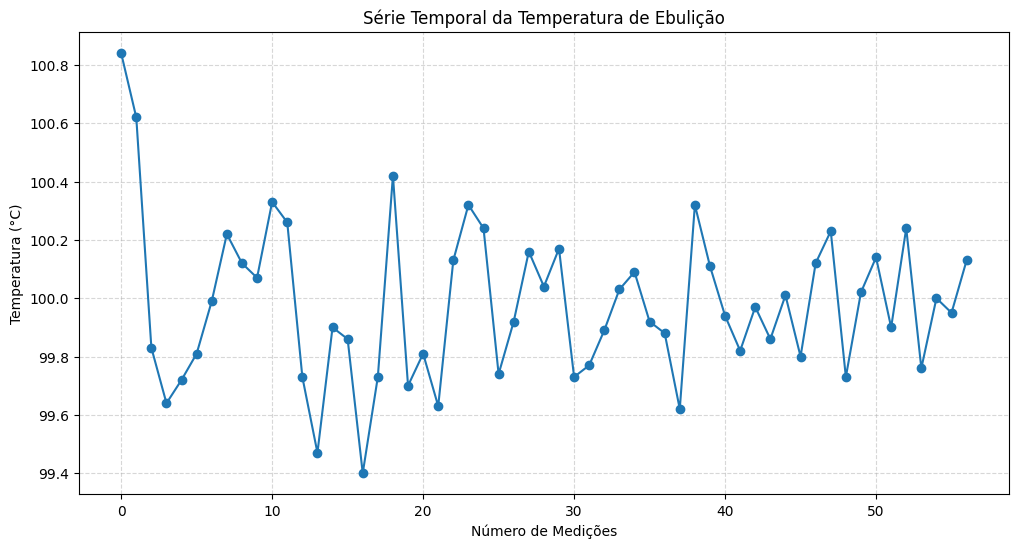

In [ ]:
#1) Leia e faça um gráfico dos dados;

plt.figure(figsize=(12, 6))
plt.plot(serie_temp, marker="o")
plt.title('Série Temporal da Temperatura de Ebulição')
plt.xlabel('Número de Medições')
plt.ylabel('Temperatura (°C)')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
# 2) Cálculo a média, desvio padrão e mediana;

mean_temp = serie_temp.mean()
std_temp = serie_temp.std()
median_temp = serie_temp.median()

print(f"Média: {mean_temp:.2f}°C")
print(f"Desvio Padrão: {std_temp:.2f}°C")
print(f"Mediana: {median_temp:.2f}°C")

Média: 99.98°C
Desvio Padrão: 0.27°C
Mediana: 99.95°C


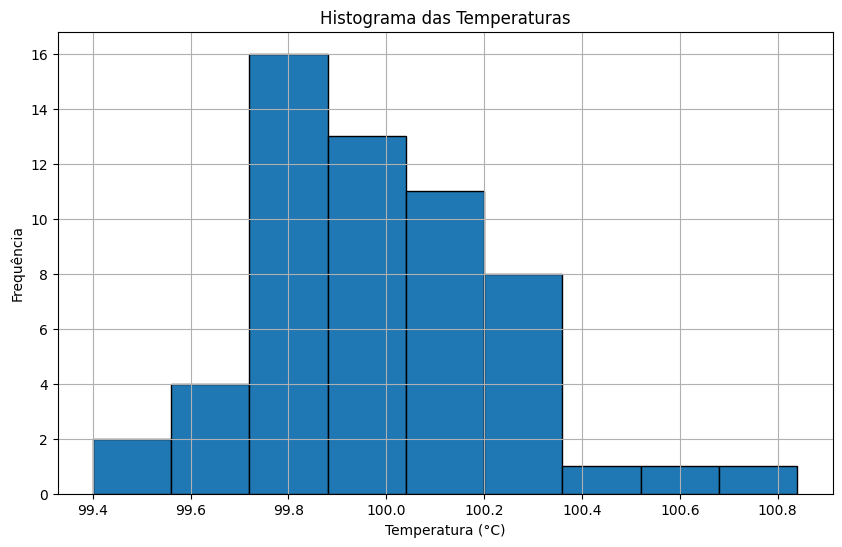

In [ ]:
# 3) Histogramas e gráficos de pizza;

plt.figure(figsize=(10, 6))
plt.hist(serie_temp, bins="auto", edgecolor='black')
plt.title('Histograma das Temperaturas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

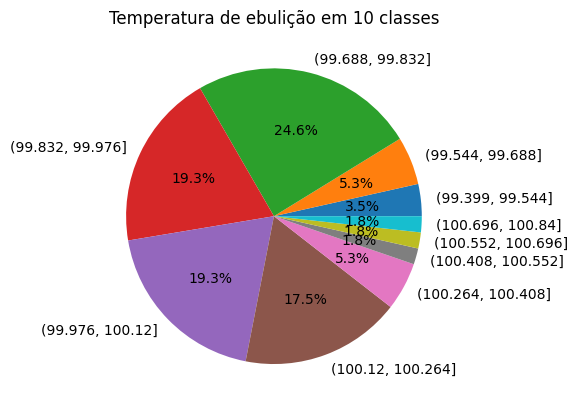

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupa os dados em 5 intervalos iguais
serie_bins = pd.cut(serie_temp, bins=10)

# Conta quantos valores caíram em cada intervalo
contagem = serie_bins.value_counts().sort_index()

plt.pie(contagem, labels=contagem.index.astype(str), autopct='%1.1f%%')
plt.title("Temperatura de ebulição em 10 classes")
plt.show()

Cálculo do grau de liberdade (v):
v=R−1 ,

em que R é o número de categorias.


O teste qui-quadrado (ou χ²) é um teste estatístico usado para verificar se as frequências observadas de dados categóricos são significativamente diferentes das frequências esperadas. Ele avalia a existência de uma associação entre variáveis, comparando o que foi observado na amostra com o que seria esperado se não houvesse relação entre elas.

### Como deveria ser feito (resumidamente)

1. **Dividir os dados em classes**  
   - Usar `np.histogram` para gerar `hist_vals` (frequências observadas, **O**) e `bin_edges`.  
   - Para cada classe `[a, b)`, calcular a **probabilidade esperada** sob Normal(μ, σ):  

     \[
     P = \Phi\left(\frac{b - \mu}{\sigma}\right) - \Phi\left(\frac{a - \mu}{\sigma}\right)
     \]

   - Multiplicar por `n` (tamanho da amostra) → frequências esperadas (**E**).

2. **Aplicar o qui-quadrado**  

   \[
   \chi^2 = \sum \frac{(O - E)^2}{E}
   \]

   com graus de liberdade:  

   \[
   gl = k - 1 - m
   \]

   onde `k` = número de classes, `m` = nº de parâmetros estimados (para Normal → 2: média e desvio).

3. **Comparar** o valor do qui-quadrado calculado com o valor crítico da distribuição qui-quadrado, ou usar o `p_valor`.


In [ ]:
# 4) Faça o teste de Chi-Quadrado para verificar se a amostra respeita a distribuição normal;

from scipy.stats import norm, chi2

# parâmetros da normal
mu, sigma = serie_temp.mean(), serie_temp.std(ddof=1)
n = len(serie_temp)

# Passo 1) Defini meu número de bins = 10, ou seja, fixo no meu teste!!!!
k = 10
hist_vals, bin_edges = np.histogram(serie_temp, bins=k)

# Passo 2) Frequências observadas
O = hist_vals

# Passo 3) Frequências esperadas segundo Normal(mu, sigma)
E = []
for i in range(len(bin_edges)-1):
    p = norm.cdf(bin_edges[i+1], mu, sigma) - norm.cdf(bin_edges[i], mu, sigma)
    E.append(p * n)
E = np.array(E)

# Passo 4) Estatística do qui-quadrado
chi2_stat = ((O - E) ** 2 / E).sum()

# Graus de liberdade: k - 1 - m (m = 2 parâmetros estimados: μ e σ)
gl = k - 1 - 2

# Valor crítico e p-valor
alpha = 0.05
valor_critico = chi2.ppf(1 - alpha, gl)
p_valor = 1 - chi2.cdf(chi2_stat, gl)

# --- Resultados ---
print(f"Tamanho da amostra: {n}")
print(f"Média = {mu:.4f}, Desvio = {sigma:.4f}")
print(f"Qui-quadrado = {chi2_stat:.4f}")
print(f"grau de liberdade = {gl}")
print(f"Valor crítico (α={alpha}) = {valor_critico:.4f}")
print(f"p-valor = {p_valor:.4f}")

if chi2_stat > valor_critico:
    print("Rejeita a hipótese nula: a amostra NÃO segue Normal.")
else:
    print("Não rejeita a hipótese nula: a amostra é compatível com Normal.")


Tamanho da amostra: 57
Média = 99.9789, Desvio = 0.2663
Qui-quadrado = 11.4270
grau de liberdade = 7
Valor crítico (α=0.05) = 14.0671
p-valor = 0.1210
Não rejeita a hipótese nula: a amostra é compatível com Normal.


In [ ]:
# 5) Obtenha a temperatura média agrupando medidas de i) 10 em 10 pontos, ii) 20 em 20 pontos, iii) 30 em 30 pontos;

# Vamos juntar as médias com o comando "groupby"!!!!!!!

# médias de 10 em 10, vale lembrar que o // aqui faz divisão de inteiros!
means_10 = serie_temp.groupby(np.arange(len(serie_temp)) // 10).mean()

# médias de 20 em 20
means_20 = serie_temp.groupby(np.arange(len(serie_temp)) // 20).mean()

# médias de 30 em 30
means_30 = serie_temp.groupby(np.arange(len(serie_temp)) // 30).mean()

# organiza em DataFrame
df_means = pd.DataFrame({
    "media_10em10": pd.Series(means_10),
    "media_20em20": pd.Series(means_20),
    "media_30em30": pd.Series(means_30)
})

print(df_means.round(4))

   media_10em10  media_20em20  media_30em30
0      100.0860       99.9830       99.9940
1       99.8800       99.9760       99.9622
2      100.0160       99.9776           NaN
3       99.9360           NaN           NaN
4       99.9500           NaN           NaN
5      100.0171           NaN           NaN
